<a href="https://colab.research.google.com/github/RutujaJadhav/Baby-got-Back/blob/master/BABY_GOT_BACK_milestone_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Collecting and labeling data

For** iteration 1**, we scraped about 100 images for every class- Blanket, Stuffed animals and labeled them using LabelImg tool.

For** iteration 2**, we scraped over 1.5K images and used LabelBox to manage our labeling. 

#Cleaning data

The annotations obtained from labeling tools for the images are converted to .csv file which is then converted to Tensorflow-record files.

In [0]:
# tf-record files
!ls

label_map.pbtxt		     train.record-00009-of-00010
sample_data		     val.record-00000-of-00010
train.record-00000-of-00010  val.record-00001-of-00010
train.record-00001-of-00010  val.record-00002-of-00010
train.record-00002-of-00010  val.record-00003-of-00010
train.record-00003-of-00010  val.record-00004-of-00010
train.record-00004-of-00010  val.record-00005-of-00010
train.record-00005-of-00010  val.record-00006-of-00010
train.record-00006-of-00010  val.record-00007-of-00010
train.record-00007-of-00010  val.record-00008-of-00010
train.record-00008-of-00010  val.record-00009-of-00010


#Training with Faster R-CNN for object detection




```
# This is formatted as code
```


**model** {
  faster_rcnn {
    num_classes: 3
    image_resizer {
      keep_aspect_ratio_resizer {
        min_dimension: 600
        max_dimension: 1024
      }
    }
    feature_extractor {
      type: 'faster_rcnn_resnet101'
      first_stage_features_stride: 16
    }
    first_stage_anchor_generator {
      grid_anchor_generator {
        scales: [0.25, 0.5, 1.0, 2.0]
        aspect_ratios: [0.5, 1.0, 2.0]
        height_stride: 16
        width_stride: 16
      }
    }
    first_stage_box_predictor_conv_hyperparams {
      op: CONV
      regularizer {
        l2_regularizer {
          weight: 0.0
        }
      }
      initializer {
        truncated_normal_initializer {
          stddev: 0.01
        }
      }
    }
    first_stage_nms_score_threshold: 0.0
    first_stage_nms_iou_threshold: 0.7
    first_stage_max_proposals: 300
    first_stage_localization_loss_weight: 2.0
    first_stage_objectness_loss_weight: 1.0
    initial_crop_size: 14
    maxpool_kernel_size: 2
    maxpool_stride: 2
    second_stage_box_predictor {
      mask_rcnn_box_predictor {
        use_dropout: false
        dropout_keep_probability: 1.0
        fc_hyperparams {
          op: FC
          regularizer {
            l2_regularizer {
              weight: 0.0
            }
          }
          initializer {
            variance_scaling_initializer {
              factor: 1.0
              uniform: true
              mode: FAN_AVG
            }
          }
        }
      }
    }
    second_stage_post_processing {
      batch_non_max_suppression {
        score_threshold: 0.0
        iou_threshold: 0.6
        max_detections_per_class: 100
        max_total_detections: 300
      }
      score_converter: SIGMOID
    }
    second_stage_localization_loss_weight: 2.0
    second_stage_classification_loss_weight: 1.0
  }
}

train_config: {
  batch_size: 1
  optimizer {
    momentum_optimizer: {
      learning_rate: {
        manual_step_learning_rate {
          initial_learning_rate: 0.0003
          schedule {
            step: 900000
            learning_rate: .00003
          }
          schedule {
            step: 1200000
            learning_rate: .000003
          }
        }
      }
      momentum_optimizer_value: 0.9
    }
    use_moving_average: false
  }
  gradient_clipping_by_norm: 10.0
  fine_tune_checkpoint: "/content/models/research/model.ckpt"
  from_detection_checkpoint: true
  load_all_detection_checkpoint_vars: true
  num_steps: 200000
  data_augmentation_options {
    random_horizontal_flip {
    }
  }
}

train_input_reader: {
  tf_record_input_reader {
    input_path: "/content/models/research/object_detection/data/train.record*"
  }
  label_map_path: "/content/models/research/object_detection/data/label_map.pbtxt"
}

eval_config: {
  metrics_set: "coco_detection_metrics"
  num_examples: 1101
}

**eval_input_reader**: {
  tf_record_input_reader {
    input_path: "/content/models/research/object_detection/data/val.record-00007-of-00010"
  }
  label_map_path: "/content/models/research/object_detection/data/label_map.pbtxt"
  shuffle: false
  num_readers: 1
}



# install pre requisits


In [0]:
!apt-get install protobuf-compiler python-pil python-lxml python-tk
!pip install Cython
!pip install jupyter
!pip install matplotlib

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-pil is already the newest version (5.1.0-1).
python-tk is already the newest version (2.7.15~rc1-1).
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
python-lxml is already the newest version (4.2.1-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [0]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 23999 (delta 4), reused 10 (delta 4), pack-reused 23987
Receiving objects: 100% (23999/23999), 505.70 MiB | 12.72 MiB/s, done.
Resolving deltas: 100% (14194/14194), done.
Checking out files: 100% (2768/2768), done.


In [0]:
!git clone https://github.com/cocodataset/cocoapi.git
!cd cocoapi/PythonAPI; make; cp -r pycocotools /content/models/research/

Cloning into 'cocoapi'...
remote: Enumerating objects: 947, done.
remote: Total 947 (delta 0), reused 0 (delta 0), pack-reused 947
Receiving objects: 100% (947/947), 11.69 MiB | 5.76 MiB/s, done.
Resolving deltas: 100% (565/565), done.
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python2.7/dist-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-2.7
creating build/temp.linux-x86_64-2.7/pycocotools
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -Wstrict-prototypes -fno-strict-aliasing -Wdate-time -D_FORTIFY_SOURCE=2 -g -fdebug-prefix-map=/build/python2.7-3hk45v/python2.7-2.7.15~rc1=

In [0]:
cd /content/models/research

/content/models/research


In [0]:
%set_env PYTHONPATH=/content/models/research:/content/models/research/slim

env: PYTHONPATH=/content/models/research:/content/models/research/slim


In [0]:
!protoc object_detection/protos/*.proto --python_out=.

Test the API

In [0]:
!python object_detection/builders/model_builder_test.py


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

.W0218 22:36:53.405450 140696616896384 deprecation.py:323] From /content/models/research/object_detection/anchor_generators/grid_anchor_generator.py:59: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
....................s
----------------------------------------------------------------------
Ran 22 tests in 0.123s

OK (skipped=1)


# **Accessing TF-record files from the drive**

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Using faster RCNN RESNET for training our data

In [0]:
!wget http://storage.googleapis.com/download.tensorflow.org/models/object_detection/faster_rcnn_resnet101_coco_11_06_2017.tar.gz
!tar -xvf faster_rcnn_resnet101_coco_11_06_2017.tar.gz
!cp faster_rcnn_resnet101_coco_11_06_2017/model.ckpt.* .

--2019-02-18 23:03:55--  http://storage.googleapis.com/download.tensorflow.org/models/object_detection/faster_rcnn_resnet101_coco_11_06_2017.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 2404:6800:4008:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 595490113 (568M) [application/x-tar]
Saving to: ‘faster_rcnn_resnet101_coco_11_06_2017.tar.gz.1’

faster_rcnn_resnet1 100%[===================>] 567.90M  39.2MB/s    in 14s     

2019-02-18 23:04:10 (40.7 MB/s) - ‘faster_rcnn_resnet101_coco_11_06_2017.tar.gz.1’ saved [595490113/595490113]

faster_rcnn_resnet101_coco_11_06_2017/
faster_rcnn_resnet101_coco_11_06_2017/model.ckpt.index
faster_rcnn_resnet101_coco_11_06_2017/model.ckpt.meta
faster_rcnn_resnet101_coco_11_06_2017/frozen_inference_graph.pb
faster_rcnn_resnet101_coco_11_06_2017/model.ckpt.data-00000-of-00001
faster_rcnn_resnet101_coco_1

# get the config file and edit it to have the right directories

In [0]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!cp -r "/content/drive/Team Drives/Team of 4/R-CNN transfer learning/"* /content/models/research/

!ls "/content/models/research/"




cp: cannot stat '/content/drive/Team Drives/Team of 4/R-CNN transfer learning/*': No such file or directory
ls: cannot access '/content/models/research/': No such file or directory


In [0]:

!ls

a3c_blogpost					maskgan
adversarial_crypto				minigo
adversarial_logit_pairing			model.ckpt.data-00000-of-00001
adversarial_text				model.ckpt.index
adv_imagenet_models				model.ckpt.meta
astronet					morph_net
attention_ocr					namignizer
audioset					neural_gpu
autoaugment					neural_programmer
autoencoder					next_frame_prediction
brain_coder					nst_blogpost
cognitive_mapping_and_planning			object_detection
cognitive_planning				pcl_rl
compression					ptn
cvt_text					pycocotools
deep_contextual_bandits				qa_kg
deeplab						README.md
deep_speech					real_nvp
delf						rebar
differential_privacy				resnet
domain_adaptation				sentiment_analysis
efficient-hrl					seq2species
faster_rcnn_resnet101_coco_11_06_2017		setup.py
faster_rcnn_resnet101_coco_11_06_2017.tar.gz	skip_thoughts
faster_rcnn_resnet101_coco_11_06_2017.tar.gz.1	slim
fivo						steve
gan						street
global_objectives				struct2depth
im2txt						swivel
inception					syntaxnet
keypointnet					tcn
learned_optimizer				ten

# train the model

In [0]:
!mkdir train
!ls

mkdir: cannot create directory ‘train’: File exists
a3c_blogpost					marco
adversarial_crypto				maskgan
adversarial_logit_pairing			minigo
adversarial_text				model.ckpt.data-00000-of-00001
adv_imagenet_models				model.ckpt.index
astronet					model.ckpt.meta
attention_ocr					morph_net
audioset					namignizer
autoaugment					neural_gpu
autoencoder					neural_programmer
brain_coder					next_frame_prediction
cognitive_mapping_and_planning			nst_blogpost
cognitive_planning				object_detection
compression					pcl_rl
cvt_text					ptn
deep_contextual_bandits				pycocotools
deeplab						qa_kg
deep_speech					README.md
delf						real_nvp
differential_privacy				rebar
domain_adaptation				resnet
efficient-hrl					sentiment_analysis
faster_rcnn_resnet101_coco_11_06_2017		seq2species
faster_rcnn_resnet101_coco_11_06_2017.tar.gz	setup.py
faster_rcnn_resnet101_coco_11_06_2017.tar.gz.1	skip_thoughts
faster_rcnn_resnet101_pets.config		slim
fivo						steve
gan						street
global_objectives				struct2

In [0]:
!python object_detection/model_main.py \
    --logtostderr \
    --pipeline_config_path=/content/models/research/faster_rcnn_resnet101_pets.config \
    --train_dir=/content/models/research/train 2>&1 /content/log/tb.log & 



# evaluate the model




In [0]:
!mkdir eval #run only once

In [0]:
get_ipython().system_raw('CUDA_VISIBLE_DEVICES="" python object_detection/eval.py \
    --logtostderr \
    --pipeline_config_path=/content/models/research/faster_rcnn_resnet101_pets.config \
    --checkpoint_dir=/content/models/research/train \
    --eval_dir=/content/models/research/eval &')

In [0]:
#!kill 1877
!ps -ef > a.a; cat a.a; ls -l train



UID        PID  PPID  C STIME TTY          TIME CMD
root         1     0  0 02:52 ?        00:00:00 /bin/bash -e /datalab/run.sh
root        70     1  0 02:53 ?        00:00:05 node /tools/node/bin/forever --minUptime 1000 --spinSleepTime 1000 /datalab/web/app.js
root        80    70  0 02:53 ?        00:00:39 /tools/node/bin/node /datalab/web/app.js
root        90    80  0 02:53 ?        00:00:15 /usr/bin/python2 /usr/local/bin/jupyter-notebook -y --no-browser --log-level=DEBUG --debug --NotebookApp.allow_origin="*" --NotebookApp.log_format="%(message)s" --NotebookApp.token= --Session.key="" --Session.keyfile="" --ContentsManager.untitled_directory="Untitled Folder" --ContentsManager.untitled_file="Untitled File" --ContentsManager.untitled_notebook="Untitled Notebook" --NotebookNotary.algorithm="sha1" --KernelManager.autorestart=True --MultiKernelManager.default_kernel_name="python2" --ip="127.0.0.1" --port=9000 --port-retries=0 --notebook-dir="/content" --NotebookNotary.algorithm=sha

#Training accuracy

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "object_detection/model_main.py", line 26, in <module>
    from object_detection import model_lib
  File "/content/models/research/object_detection/model_lib.py", line 27, in <module>
    from object_detection import eval_util
  File "/content/models/research/object_detection/eval_util.py", line 27, in <module>
    from object_detection.metrics import coco_evaluation
  File "/content/models/research/object_detection/metrics/coco_evaluation.py", line 20, in <module>
    from object_detection.metrics import coco_tools
  File "/content/models/research/object_detection/metrics/coco_tools.py", line 47, in <module>
    from pycocotools import coco
  File "/content/models/research/pycocotools/coco.py", line 49, in <module>
    import matplotlib.pyplot as plt
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.py", line 71, in <module>
    from matplotlib.backends import pylab_setup
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/backends/__init__.py", line 16, in <module>
    line for line in traceback.format_stack()


  import matplotlib; matplotlib.use('Agg')  # pylint: disable=multiple-statements

WARNING: The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

WARNING:tensorflow:Forced number of epochs for all eval validations to be 1.
WARNING:tensorflow:Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
WARNING:tensorflow:Using temporary folder as model directory: /tmp/tmpXYslIQ
WARNING:tensorflow:Estimator's model_fn (<function model_fn at 0x7fd79157ae60>) includes params argument, but params are not passed to Estimator.
WARNING:tensorflow:From /usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
WARNING:tensorflow:num_readers has been reduced to 1 to match input file shards.
WARNING:tensorflow:From /content/models/research/object_detection/builders/dataset_builder.py:80: parallel_interleave (from tensorflow.contrib.data.python.ops.interleave_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.experimental.parallel_interleave(...)`.
WARNING:tensorflow:From /content/models/research/object_detection/anchor_generators/grid_anchor_generator.py:59: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
WARNING:tensorflow:From /content/models/research/object_detection/utils/ops.py:466: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
WARNING:tensorflow:From /content/models/research/object_detection/builders/dataset_builder.py:148: batch_and_drop_remainder (from tensorflow.contrib.data.python.ops.batching) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.Dataset.batch(..., drop_remainder=True)`.
WARNING:tensorflow:From /usr/local/lib/python2.7/dist-packages/tensorflow_estimator/python/estimator/util.py:104: make_initializable_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.
WARNING:tensorflow:From /usr/local/lib/python2.7/dist-packages/tensorflow/contrib/layers/python/layers/layers.py:1624: flatten (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.flatten instead.
WARNING:tensorflow:From /content/models/research/object_detection/meta_architectures/faster_rcnn_meta_arch.py:2236: get_or_create_global_step (from tensorflow.contrib.framework.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Please switch to tf.train.get_or_create_global_step
WARNING:root:Variable [SecondStageBoxPredictor/BoxEncodingPredictor/biases] is available in checkpoint, but has an incompatible shape with model variable. Checkpoint shape: [[360]], model variable shape: [[556]]. This variable will not be initialized from the checkpoint.
WARNING:root:Variable [SecondStageBoxPredictor/BoxEncodingPredictor/weights] is available in checkpoint, but has an incompatible shape with model variable. Checkpoint shape: [[2048, 360]], model variable shape: [[2048, 556]]. This variable will not be initialized from the checkpoint.
WARNING:root:Variable [SecondStageBoxPredictor/ClassPredictor/biases] is available in checkpoint, but has an incompatible shape with model variable. Checkpoint shape: [[91]], model variable shape: [[140]]. This variable will not be initialized from the checkpoint.
WARNING:root:Variable [SecondStageBoxPredictor/ClassPredictor/weights] is available in checkpoint, but has an incompatible shape with model variable. Checkpoint shape: [[2048, 91]], model variable shape: [[2048, 140]]. This variable will not be initialized from the checkpoint.
WARNING:root:Variable [global_step] is not available in checkpoint
WARNING:tensorflow:From /content/models/research/object_detection/core/losses.py:345: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

WARNING:tensorflow:From /content/models/research/object_detection/core/losses.py:345: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
2019-02-19 00:37:58.852004: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2019-02-19 00:37:58.852330: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x560cc37912e0 executing computations on platform Host. Devices:
2019-02-19 00:37:58.852381: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-02-19 00:37:59.015517: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-02-19 00:37:59.016291: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x560cc3791c80 executing computations on platform CUDA. Devices:
2019-02-19 00:37:59.016340: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): Tesla K80, Compute Capability 3.7
2019-02-19 00:37:59.016927: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1433] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
totalMemory: 11.17GiB freeMemory: 11.10GiB
2019-02-19 00:37:59.016965: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0
2019-02-19 00:37:59.989821: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2019-02-19 00:37:59.989881: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 
2019-02-19 00:37:59.989900: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N 
2019-02-19 00:37:59.990220: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2019-02-19 00:37:59.990321: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10754 MB memory) -> physical GPU (device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7)
2019-02-19 00:38:20.419854: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 00:38:20.605226: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 00:38:20.631238: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 00:38:23.790331: I tensorflow/stream_executor/dso_loader.cc:152] successfully opened CUDA library libcublas.so.10.0 locally
WARNING:tensorflow:From /content/models/research/object_detection/eval_util.py:750: to_int64 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
WARNING:tensorflow:From /content/models/research/object_detection/eval_util.py:750: to_int64 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
WARNING:tensorflow:From /content/models/research/object_detection/utils/visualization_utils.py:429: py_func (from tensorflow.python.ops.script_ops) is deprecated and will be removed in a future version.
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, use
    tf.py_function, which takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    
WARNING:tensorflow:From /content/models/research/object_detection/utils/visualization_utils.py:429: py_func (from tensorflow.python.ops.script_ops) is deprecated and will be removed in a future version.
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, use
    tf.py_function, which takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    
2019-02-19 00:48:40.434703: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0
2019-02-19 00:48:40.434774: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2019-02-19 00:48:40.434801: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 
2019-02-19 00:48:40.434821: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N 
2019-02-19 00:48:40.435066: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10754 MB memory) -> physical GPU (device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7)
WARNING:tensorflow:From /usr/local/lib/python2.7/dist-packages/tensorflow/python/training/saver.py:1266: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
WARNING:tensorflow:From /usr/local/lib/python2.7/dist-packages/tensorflow/python/training/saver.py:1266: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
2019-02-19 00:48:42.950673: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 00:48:42.950748: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 00:48:43.114185: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 00:48:43.114276: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 00:48:43.136033: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 00:48:43.136115: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
creating index...
index created!
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.37s).
Accumulating evaluation results...
DONE (t=0.18s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.154
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.392
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.060
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.378
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.152
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.243
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.468
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.479
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.650
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.475
2019-02-19 00:58:41.408846: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0
2019-02-19 00:58:41.408922: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2019-02-19 00:58:41.408943: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 
2019-02-19 00:58:41.408955: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N 
2019-02-19 00:58:41.409209: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10754 MB memory) -> physical GPU (device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7)
2019-02-19 00:58:44.003750: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 00:58:44.003845: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 00:58:44.171618: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 00:58:44.171759: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 00:58:44.193128: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 00:58:44.193227: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
creating index...
index created!
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.42s).
Accumulating evaluation results...
DONE (t=0.20s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.221
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.459
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.172
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.625
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.216
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.345
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.488
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.500
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.650
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.498
2019-02-19 01:08:42.272570: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0
2019-02-19 01:08:42.272660: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2019-02-19 01:08:42.272688: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 
2019-02-19 01:08:42.272708: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N 
2019-02-19 01:08:42.273019: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10754 MB memory) -> physical GPU (device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7)
2019-02-19 01:08:44.824179: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 01:08:44.824280: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 01:08:44.990354: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 01:08:44.990449: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 01:08:45.011285: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 01:08:45.011378: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
creating index...
index created!
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.45s).
Accumulating evaluation results...
DONE (t=0.21s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.238
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.497
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.160
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.750
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.232
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.314
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.549
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.600
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.750
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.594
WARNING:tensorflow:From /usr/local/lib/python2.7/dist-packages/tensorflow/python/training/saver.py:966: remove_checkpoint (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to delete files with this prefix.
WARNING:tensorflow:From /usr/local/lib/python2.7/dist-packages/tensorflow/python/training/saver.py:966: remove_checkpoint (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to delete files with this prefix.
2019-02-19 01:28:42.439587: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0
2019-02-19 01:28:42.439676: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2019-02-19 01:28:42.439715: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 
2019-02-19 01:28:42.439730: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N 
2019-02-19 01:28:42.440025: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10754 MB memory) -> physical GPU (device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7)
2019-02-19 01:28:45.072298: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 01:28:45.072410: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 01:28:45.241316: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 01:28:45.241452: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 01:28:45.263055: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 01:28:45.263153: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
creating index...
index created!
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.48s).
Accumulating evaluation results...
DONE (t=0.21s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.208
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.411
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.188
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.625
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.204
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.323
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.513
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.528
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.650
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.525
2019-02-19 01:38:42.808945: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0
2019-02-19 01:38:42.809018: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2019-02-19 01:38:42.809039: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 
2019-02-19 01:38:42.809051: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N 
2019-02-19 01:38:42.809322: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10754 MB memory) -> physical GPU (device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7)
2019-02-19 01:38:45.376027: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 01:38:45.376118: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 01:38:45.542464: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 01:38:45.542570: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 01:38:45.564570: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 01:38:45.564669: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
creating index...
index created!
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.51s).
Accumulating evaluation results...
DONE (t=0.22s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.204
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.398
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.169
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.700
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.196
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.323
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.542
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.542
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.700
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.539
2019-02-19 01:48:43.058126: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0
2019-02-19 01:48:43.058204: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2019-02-19 01:48:43.058231: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 
2019-02-19 01:48:43.058252: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N 
2019-02-19 01:48:43.058565: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10754 MB memory) -> physical GPU (device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7)
2019-02-19 01:48:45.703169: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 01:48:45.703278: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 01:48:45.873330: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 01:48:45.873439: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 01:48:45.895526: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 01:48:45.895610: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
creating index...
index created!
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.49s).
Accumulating evaluation results...
DONE (t=0.23s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.221
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.416
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.165
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.750
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.216
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.366
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.514
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.526
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.750
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.523
2019-02-19 01:58:43.884614: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0
2019-02-19 01:58:43.884715: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2019-02-19 01:58:43.884737: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 
2019-02-19 01:58:43.884750: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N 
2019-02-19 01:58:43.885018: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10754 MB memory) -> physical GPU (device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7)
2019-02-19 01:58:46.489237: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 01:58:46.489326: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 01:58:46.664868: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 01:58:46.664957: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 01:58:46.686473: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 01:58:46.686555: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
creating index...
index created!
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.50s).
Accumulating evaluation results...
DONE (t=0.22s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.255
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.465
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.276
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.727
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.252
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.379
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.547
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.547
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.800
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.542
2019-02-19 02:18:44.767203: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0
2019-02-19 02:18:44.767287: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2019-02-19 02:18:44.767311: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 
2019-02-19 02:18:44.767323: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N 
2019-02-19 02:18:44.767634: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10754 MB memory) -> physical GPU (device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7)
2019-02-19 02:18:47.383743: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 02:18:47.383844: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 02:18:47.553854: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 02:18:47.553950: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 02:18:47.575574: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 02:18:47.575682: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
creating index...
index created!
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.53s).
Accumulating evaluation results...
DONE (t=0.23s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.227
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.411
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.282
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.801
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.223
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.381
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.527
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.527
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.800
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.523
2019-02-19 02:38:45.207409: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0
2019-02-19 02:38:45.207499: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2019-02-19 02:38:45.207552: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 
2019-02-19 02:38:45.207566: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N 
2019-02-19 02:38:45.207857: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10754 MB memory) -> physical GPU (device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7)
2019-02-19 02:38:47.936066: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 02:38:47.936180: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 02:38:48.108341: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 02:38:48.108436: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 02:38:48.130402: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 02:38:48.130486: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
creating index...
index created!
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.59s).
Accumulating evaluation results...
DONE (t=0.24s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.241
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.426
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.282
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.801
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.235
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.458
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.528
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.528
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.800
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.523
2019-02-19 02:48:45.236686: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0
2019-02-19 02:48:45.236762: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2019-02-19 02:48:45.236785: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 
2019-02-19 02:48:45.236809: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N 
2019-02-19 02:48:45.237057: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10754 MB memory) -> physical GPU (device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7)
2019-02-19 02:48:47.857088: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 02:48:47.857248: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 02:48:48.034156: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 02:48:48.034241: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 02:48:48.055921: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 02:48:48.056004: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
creating index...
index created!
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.56s).
Accumulating evaluation results...
DONE (t=0.24s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.254
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.426
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.288
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.800
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.250
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.437
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.566
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.566
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.800
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.564
2019-02-19 02:58:45.728394: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0
2019-02-19 02:58:45.728468: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2019-02-19 02:58:45.728505: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 
2019-02-19 02:58:45.728517: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N 
2019-02-19 02:58:45.728787: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10754 MB memory) -> physical GPU (device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7)
2019-02-19 02:58:48.388162: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 02:58:48.388258: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 02:58:48.559701: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 02:58:48.559796: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 02:58:48.581769: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 02:58:48.581873: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
creating index...
index created!
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.58s).
Accumulating evaluation results...
DONE (t=0.25s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.248
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.436
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.226
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.750
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.243
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.426
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.524
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.524
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.750
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.519
2019-02-19 03:08:45.880612: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0
2019-02-19 03:08:45.880707: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2019-02-19 03:08:45.880728: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 
2019-02-19 03:08:45.880740: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N 
2019-02-19 03:08:45.881005: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10754 MB memory) -> physical GPU (device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7)
2019-02-19 03:08:48.543969: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 03:08:48.544070: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 03:08:48.713999: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 03:08:48.714096: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 03:08:48.736270: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node Preprocessor/ResizeToRange/strided_slice_3. Error: Pack node (Preprocessor/ResizeToRange/stack_2) axis attribute is out of bounds: 0
2019-02-19 03:08:48.736355: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node ResizeToRange/strided_slice_3. Error: Pack node (ResizeToRange/stack_2) axis attribute is out of bounds: 0
creating index...
index created!
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.57s).
Accumulating evaluation results...
DONE (t=0.23s).
 **Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.83
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.82
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.83
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -83
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.82
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.83
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.81
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.87
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.88
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.87
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.88**

# Convert last checkpoint into a model


In [0]:
!rm -r  exported_graphs; mkdir exported_graphs

In [0]:
!export CHECKPOINT_NUMBER=19421; python object_detection/export_inference_graph.py \
    --input_type image_tensor \
    --pipeline_config_path faster_rcnn_resnet101_pets.config \
    --trained_checkpoint_prefix train/model.ckpt-${CHECKPOINT_NUMBER} \
    --output_directory exported_graphs

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Please switch to tf.train.get_or_create_global_step
2018-05-10 09:02:30.370240: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:898] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2018-05-10 09:02:30.370688: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1344] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
totalMemory: 11.17GiB freeMemory: 11.10GiB
2018-05-10 09:02:30.371204: I tensorflow/core/common_runtime/gpu/gpu_device.c

# Zip the graph

In [0]:
!zip -r exp_g.zip exported_graphs

updating: exported_graphs/ (stored 0%)
updating: exported_graphs/frozen_inference_graph.pb (deflated 8%)
updating: exported_graphs/model.ckpt.data-00000-of-00001 (deflated 7%)
updating: exported_graphs/model.ckpt.index (deflated 74%)
updating: exported_graphs/checkpoint (deflated 42%)
updating: exported_graphs/model.ckpt.meta (deflated 95%)
updating: exported_graphs/saved_model/ (stored 0%)
updating: exported_graphs/saved_model/saved_model.pb (deflated 8%)
updating: exported_graphs/saved_model/variables/ (stored 0%)
updating: exported_graphs/pipeline.config (deflated 68%)


#Dowloading the file

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


#Testing our results


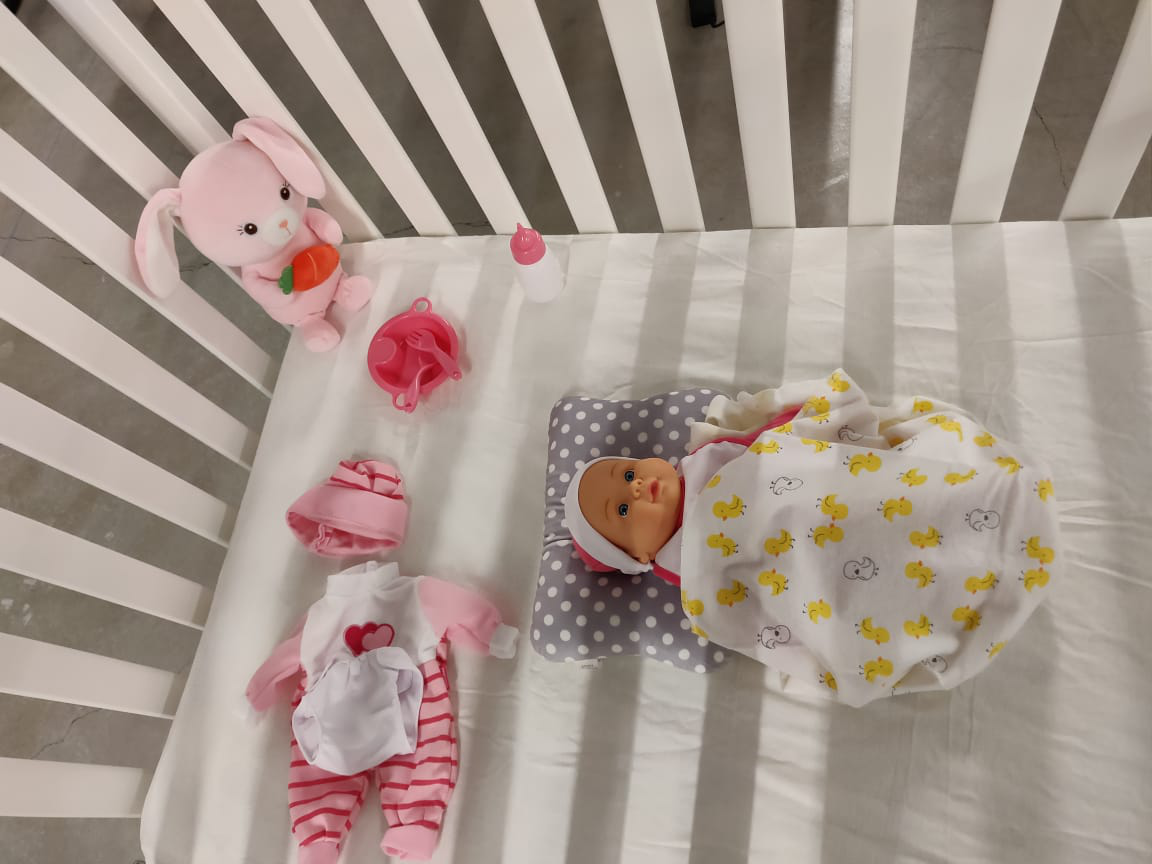

In [0]:
from PIL import Image
Image.open(open("/content/3.jpeg", 'rb'))



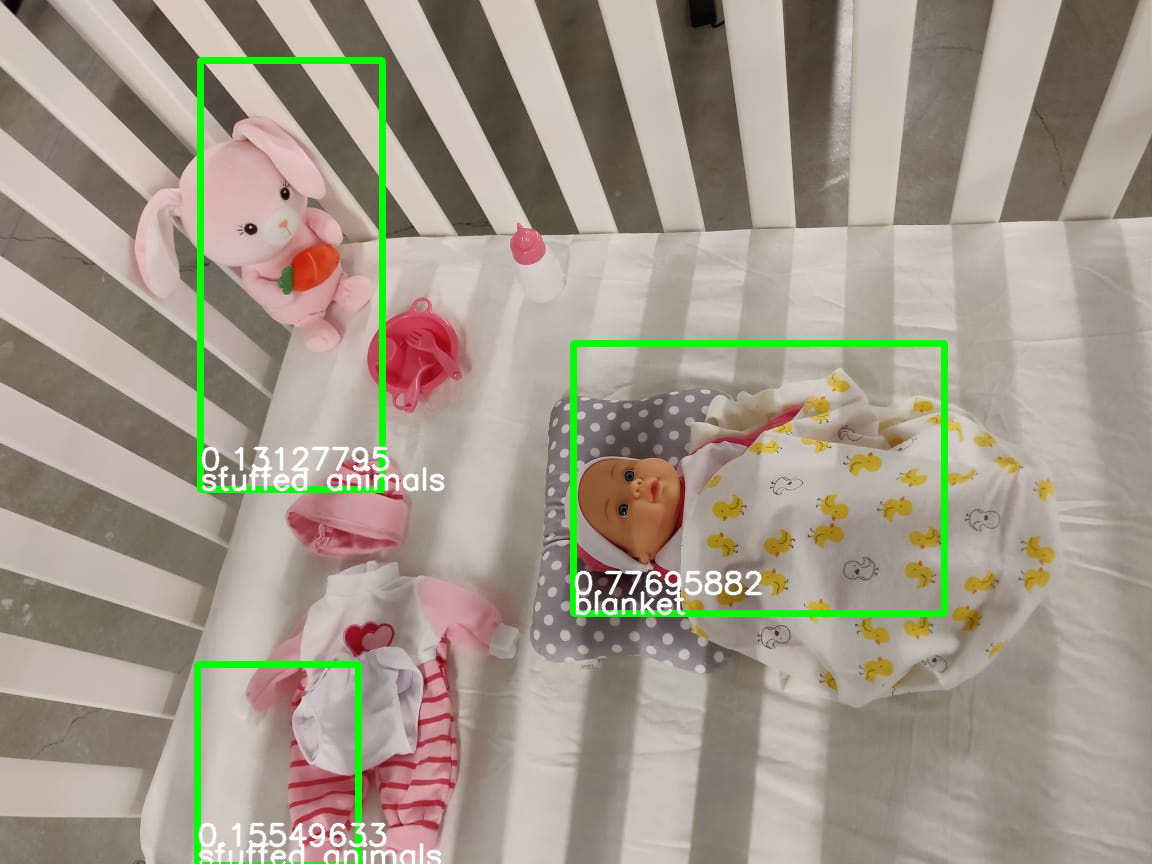

In [0]:
Image.open(open("/content/BOUNDINGBOX.jpg", 'rb'))